# Tarea 1: Programación Avanzada
Nombre: Said Fuentes Calabrano

## Preguntas teóricas

### 1) ¿Qué es un paradigma de programación?

Un paradigma de programación es una forma de programar. Que se rige por una perspectiva específica para abordar problemas de programación. Cada paradigma ofrece una alternativa para el manejo de datos convenientemente en distintos tipos de problemas. Por ejemplo, el paradigma orientado a objetos estructura el código a través de "objetos" y clases que almacenan atributos y métodos. Finalmente, dependiendo de las características del problema, un paradigma de programación se hace más recomendable que otro.

### 2) ¿En qué se basa la programación orientada a objetos?

Como bien se decía anteriormente, la programación orientada a objetos utiliza clases e instancias para representar objetos. Los cuales se dotan de atributos y métodos para cumplir su objetivo.

### 3) ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big O?

La recursividad es una técnica para resolver problemas que pueden dividirse en subproblemas similares. Haciendo que determinada función haga llamadas a si misma reiteradas veces, hasta que llegue a un caso base que se pueda calcular sin depender de llamadas anteriores. Su complejidad en términos de notación big O, depende de la profundidad de la recursión y de las instrucciones que ejecute en cada una.

Por su parte, la iteración es un técnica que utiliza bucles para ejecutar lineas de código hasta que se cumpla una condición particular. Por ejemplo, recorrer listas o calculos repetitivos. Su complejidad en términos de notación big O, depende del número de iteraciones y de las instrucciones que ejecute en cada una.

### 4) explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)


O(1) tiene tiempo de ejecución constante, independientemente de cuántos elementos se procesen, o de las entradas del programa. Un ejemplo de este rendimiento, se da cuando se realizan operaciones algebraicas entre dos números.

En cambio, O(n) tiene un tiempo de ejecución que aumenta linealmente, conforme al tamaño de la entrada. Un ejemplo de este rendimiento, se da cuando se recorre una lista de largo n.

### 5) ¿Cómo se calcula el orden en un programa que funciona por etapas?


Dado que el problema funciona por etapas, se calcular los rendimientos de cada una por separado. Luego, el rendimiento total del programa será la suma de los rendimientos de cada etapa. Finalmente, el rendimiento se reduce al térmnino dominante lo encontrado en el paso anterior; es decir, en el peor rendimiento entre todas las etapas.

### 6) ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?


Dada la naturaleza recursiva del problema, se establece una ecuación de recurrencia que determina el tiempo de ejecución que demora. La recurrencia tiene la siguiente forma:

$$
T(n)=pT(\frac{n}{q})+Cn^r
$$

Luego, se utiliza el teorema maestro. El cual establece que la solución a la ecuación de recurrencia anterior tiene solución:

$$
T(n) =
\begin{cases}
\Theta(n^r) & \text{ si } p<q^r\\
\Theta(n^r \log{n}) & \text{ si } p=q^r\\
\Theta(n^{\log_q{p}}) & \text{ si } p>q^r
\end{cases}
$$

## Programe una clase que sea capaz de calcular la cantidad posible de caminos entre 𝐴 y 𝐵, en al menos 2 formas distintas.

In [ ]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt

Nos damos cuenta que para llegar a determinada posisción, la cantidad de caminos posibles es igual a la suma de la cantidad de caminos para llegar a la celda de arriba y la de la izquierda. Por lo tanto, se pueden establecer soluciones iterativas y recursivas.

En efecto,

In [ ]:
class PCB:

  # Al inicializar la clase, se crea una matriz de nxm que representara la grilla
  def __init__(self,n,m):
    self.matriz = np.zeros((n,m))

  # metodo 1: solución iterativa
  def iterativo(self):
    for i in range(len(self.matriz)):
      for j in range(len(self.matriz[0])):
        if (i == 0) or (j == 0):
          self.matriz[i][j] = 1 # fila y columna 1 tiene solo un camino posible

        else:
          self.matriz[i][j] = self.matriz[i-1][j] + self.matriz[i][j-1]

    return self.matriz[len(self.matriz)-1][len(self.matriz[0])-1]

  # metodo 2: solucion recursiva
  def recursivo(self,i,j):
    n = len(self.matriz)
    m = len(self.matriz[0])

    # caso base: se ha llegado a la posicion de interes (punto B)
    if (i == n-1) and (j == m - 1):
      return 1

    # caso base: posiciones que exceden las dimensiones de la grilla
    if (i >= n) or (j >= m):
      return 0

    else:
      return self.recursivo(i+1,j) + self.recursivo(i,j+1)

In [ ]:
# pruebas
m1 = PCB(3,3)
print(m1.iterativo())
print(m1.recursivo(0,0)) # por construccion se debe inicializar el recorrido en el punto inicial (i = 0 y j = 0)

6.0
6


## 1) Primero, puede crear un nuevo método por cada solución programada, que entregue el tiempo de ejecución de dicha solución para un input determinado.

In [ ]:
class PCB:
  def __init__(self,n,m):
    self.matriz = np.zeros((n,m))

  # metodo 1: solución iterativa
  def iterativo(self):
    for i in range(len(self.matriz)):
      for j in range(len(self.matriz[0])):
        if (i == 0) or (j == 0):
          self.matriz[i][j] = 1

        else:
          self.matriz[i][j] = self.matriz[i-1][j] + self.matriz[i][j-1]

    return self.matriz[len(self.matriz)-1][len(self.matriz[0])-1]

  # metodo contador de la solucion iterativa:
  def t_iterativo(self):
    tiempo_inicio = perf_counter()
    self.iterativo()

    tiempo_total = perf_counter() - tiempo_inicio
    return tiempo_total


  # metodo 2: solucion recursiva
  def recursivo(self,i,j):
    n = len(self.matriz)
    m = len(self.matriz[0])

    # caso base
    if (i == n-1) and (j == m - 1):
      return 1

    if (i >= n) or (j >= m):
      return 0

    else:
      return self.recursivo(i+1,j) + self.recursivo(i,j+1)

  # metodo contador de la solucion recursiva
  def t_recursivo(self,i,j):
    tiempo_inicio = perf_counter()
    self.recursivo(i,j)

    tiempo_total = perf_counter() - tiempo_inicio
    return tiempo_total


In [ ]:
# prueba
m1 = PCB(3,3)
print(m1.t_iterativo())
print(m1.t_recursivo(0,0))

3.6248999094823375e-05
3.797299723373726e-05


## 2)  ahora puede programar un único método que recibe una función, y puede calcular el tiempo de ejecución de dicha función.

In [ ]:
# funcion que calcula tiempo
def t(func,k):
  tiempo_inicio = perf_counter()
  resultado = func(k)
  tiempo_total = perf_counter() - tiempo_inicio
  return tiempo_total

class PCB:
  def __init__(self,n,m):
    self.matriz = np.zeros((n,m))

  # metodo 1: solución iterativa
  def iterativo(self):
    for i in range(len(self.matriz)):
      for j in range(len(self.matriz[0])):
        if (i == 0) or (j == 0):
          self.matriz[i][j] = 1

        else:
          self.matriz[i][j] = self.matriz[i-1][j] + self.matriz[i][j-1]

    return self.matriz[len(self.matriz)-1][len(self.matriz[0])-1]

  # metodo 2: solucion recursiva
  def recursivo(self,i,j):
    n = len(self.matriz)
    m = len(self.matriz[0])

    # caso base
    if (i == n-1) and (j == m - 1):
      return 1

    if (i >= n) or (j >= m):
      return 0

    else:
      return self.recursivo(i+1,j) + self.recursivo(i,j+1)

  # metodo que permite seleccionar el tipo de solucion: iterativa o recursiva
  def elegir_metodo(self,k):
    if k == 0:
      return self.iterativo()

    else:
      return self.recursivo(0,0)

  # metodo tiempo de ejecucion único
  # ocupa la funcion t, que calcula el tiempo asociado a ejecutar alguna de las soluciones
  def tiempo(self,k):
    return t(self.elegir_metodo,k)

In [ ]:
# prueba
print(m1.tiempo(0)) # iterativo
print(m1.tiempo(1)) # recursivo

4.03220001317095e-05
5.51410012121778e-05


## 4) Programe un decorador que permita almacenar de alguna forma el tiempo de ejecución de una función, y utilícelo para decorar un nuevo método en su clase. Este nuevo método debe ser capaz de cambiar la forma en que calcula la respuesta entre las distintas soluciones que programó en un principio.

In [ ]:
class PCB:
  def __init__(self,n,m):
    self.matriz = np.zeros((n,m))
    self.t_sol1 = 0
    self.t_sol2 = 0

  # metodo 1: solución iterativa
  def iterativo(self):
    for i in range(len(self.matriz)):
      for j in range(len(self.matriz[0])):
        if (i == 0) or (j == 0):
          self.matriz[i][j] = 1

        else:
          self.matriz[i][j] = self.matriz[i-1][j] + self.matriz[i][j-1]

    return self.matriz[len(self.matriz)-1][len(self.matriz[0])-1]

  # metodo 2: solucion recursiva
  def recursivo(self,i,j):
    n = len(self.matriz)
    m = len(self.matriz[0])

    # caso base
    if (i == n-1) and (j == m - 1):
      return 1

    if (i >= n) or (j >= m):
      return 0

    else:
      return self.recursivo(i+1,j) + self.recursivo(i,j+1)

  # funcion que recibe una funcion. calcula el tiempo asociado a ejecutar alguna de
  # las soluciones, además, guarda los tiempos en las caracteristicas de la clase t_sol1 y t_sol2
  def t(func):
    def nueva_func(self,k):
      tiempo_inicio = perf_counter()
      func(self,k)
      tiempo_total = perf_counter() - tiempo_inicio

      if k == 0:
        self.t_sol1 = tiempo_total

      else:
        self.t_sol2 = tiempo_total

      return tiempo_total

    return nueva_func

  # decorador
  @t
  def elegir_metodo(self,k): # elige cual solucion utilizar
    if k == 0:
      return self.iterativo()

    else:
      return self.recursivo(0,0)

In [ ]:
# prueba
m2 = PCB(4,3)
print(m2.elegir_metodo(2)) # iterativo
print(m2.elegir_metodo(1)) # recursivo

6.167999890749343e-05
6.52189992251806e-05


## Finalmente, escriba un programa capaz de: generar gráficos con el tiempo de ejecución de sus soluciones, o guardar estos gráficos en formato svg si decide entregar un proyecto de python en lugar de un notebook. Puede entregar uno o varios gráficos que muestren el tiempo de ejecución de todas sus soluciones para varios inputs distintos. El o los gráficos deben contener un título, leyenda, y tener cada eje rotulado.

In [ ]:
N = [x + 1 for x in range(15)] # vector que representa los n
t_iterativo = [] # lista donde se almacenan los tiempos de las soluciones iterativas
t_recursivo = [] # lista donde se almacenan los tiempos de las soluciones recursivas

In [ ]:
# generar las soluciones para casos de grillas de nxn, con n={1,2,3,...,15}
for k in N:
  r = PCB(k,k)
  r.elegir_metodo(0) # soluciones iterativas
  r.elegir_metodo(1) # soluciones recursivas

  t_iterativo.append(r.t_sol1) # agregar tiempos iterativos a la lista
  t_recursivo.append(r.t_sol2) # agregar tiempos recursivos a la lista

([<matplotlib.axis.XTick at 0x7cd17150b700>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14')])

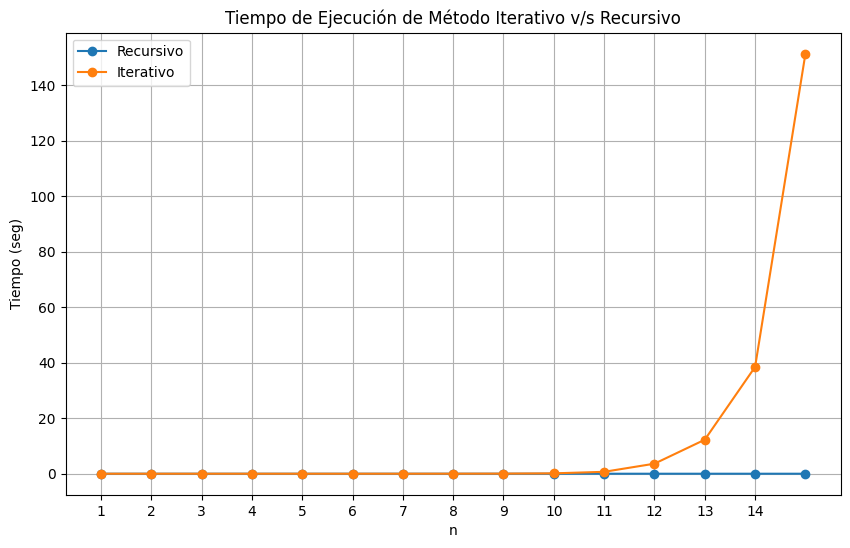

In [ ]:
# Grafico
plt.figure(figsize=(10,6))
plt.plot(t_iterativo, label=r"Recursivo", marker="o")
plt.plot(t_recursivo, label=r"Iterativo", marker="o")

plt.title("Tiempo de Ejecución de Método Iterativo v/s Recursivo")
plt.xlabel("n")
plt.ylabel("Tiempo (seg)")
plt.legend()
plt.grid()
plt.xticks(range(14),range(1,15))

Es importante destacar que, a medida que la grilla se hace más grande, el tiempo de las soluciones recursivas es mayor (comportamiento exponencial). Lo cual es considerablemente menos eficiente que el caso iterativo (~lineal). Por lo tanto, la solucion iterativo es recomendable para resolver este problema, a partir de grillas más grandes.